In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

### Exploring Data

In [3]:
AdvWorksCusts = pd.read_csv('../PreparedData/AdvWorksCusts_Prepared.csv')
AW_AveMonthSpend = pd.read_csv('../PreparedData/AW_AveMonthSpend_Prepared.csv')
AW_BikeBuyer = pd.read_csv('../PreparedData/AW_BikeBuyer_Prepared.csv')
print(AdvWorksCusts.shape, AW_AveMonthSpend.shape, AW_BikeBuyer.shape)
AdvWorksCusts.head()

(16404, 23) (16404, 2) (16404, 2)


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [4]:
# Statistical value for numeric variables
print(AdvWorksCusts.describe().round(3))
print(AW_AveMonthSpend.describe())
print(AW_BikeBuyer.describe().round(3))

       CustomerID  HomeOwnerFlag  NumberCarsOwned  NumberChildrenAtHome  \
count   16404.000      16404.000        16404.000             16404.000   
mean    20240.143          0.674            1.500                 0.991   
std      5340.371          0.469            1.139                 1.514   
min     11000.000          0.000            0.000                 0.000   
25%     15617.750          0.000            1.000                 0.000   
50%     20231.500          1.000            2.000                 0.000   
75%     24862.250          1.000            2.000                 2.000   
max     29482.000          1.000            4.000                 5.000   

       TotalChildren  YearlyIncome  
count      16404.000     16404.000  
mean           2.005     78128.532  
std            1.682     39726.533  
min            0.000      9482.000  
25%            0.000     47811.750  
50%            2.000     76125.000  
75%            3.000    105200.250  
max            5.000    1965

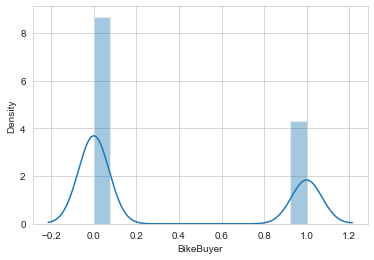

0    10953
1     5451
Name: BikeBuyer, dtype: int64


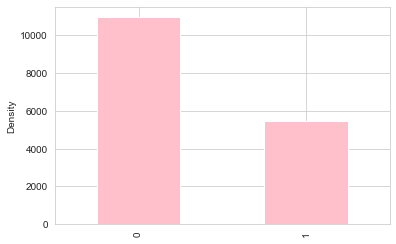

In [5]:
# Distribution the values in the BikeBuyer column
def plot_hist(vals, bins=None):
    sns.set_style('whitegrid')
    sns.distplot(vals, bins=bins)
    plt.ylabel('Density')
    plt.show()
    
def plot_dist(df, cols):
    counts = df[cols].value_counts()
    print(counts)
    fig = plt.figure()
    ax = fig.gca()
    counts.plot.bar(ax=ax, color='pink')
    ax.set_ylabel('Density')
    plt.show()
    
plot_hist(vals=AW_BikeBuyer['BikeBuyer'])
plot_dist(AW_BikeBuyer, cols='BikeBuyer')

In [6]:
# Ranks the median YearlyIncome by Occupation (from lowest to highest)
AdvWorksCusts.groupby(['Occupation']).median()['YearlyIncome']

Occupation
Clerical           49481.0
Management        118781.0
Manual             21722.0
Professional       99051.5
Skilled Manual     66471.5
Name: YearlyIncome, dtype: float64

M    1476
F    1456
Name: Gender, dtype: int64


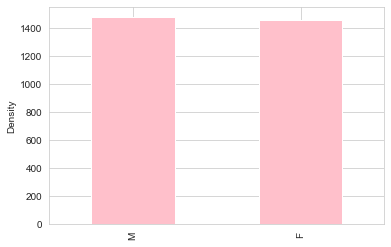

M    5067
F    4914
Name: Gender, dtype: int64


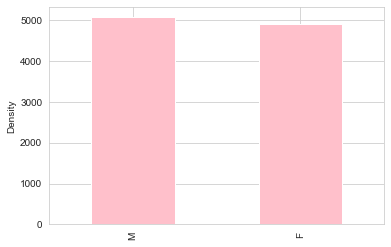

F    534
M    520
Name: Gender, dtype: int64


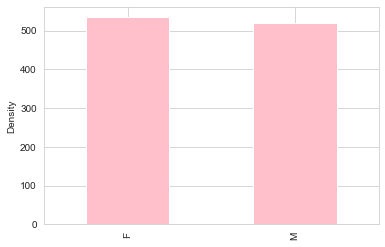

In [7]:
# Create a column represents the age of customer
AdvWorksCusts['dummy'] = np.full(shape=AdvWorksCusts.shape[0], fill_value=pd.to_datetime('1998-01-01'))
AdvWorksCusts['Age'] = (AdvWorksCusts['dummy'] - pd.to_datetime(AdvWorksCusts['BirthDate'])) \
                        / np.timedelta64(1,'Y')

age_group_a = AdvWorksCusts.loc[AdvWorksCusts['Age'] <= 25]
age_group_b = AdvWorksCusts.loc[(AdvWorksCusts['Age'] > 25) & (AdvWorksCusts['Age'] <= 45)]
age_group_c = AdvWorksCusts.loc[AdvWorksCusts['Age'] > 55]

plot_dist(age_group_a, cols='Gender')
plot_dist(age_group_b, cols='Gender')
plot_dist(age_group_c, cols='Gender')


In [8]:
age_group_a = age_group_a.merge(AW_AveMonthSpend, on='CustomerID')
age_group_b = age_group_b.merge(AW_AveMonthSpend, on='CustomerID')
age_group_c = age_group_c.merge(AW_AveMonthSpend, on='CustomerID')

In [9]:
print(age_group_a.groupby(['Gender']).describe()['AveMonthSpend'])
print(age_group_b.groupby(['Gender']).describe()['AveMonthSpend'])
print(age_group_c.groupby(['Gender']).describe()['AveMonthSpend'])

         count       mean        std   min   25%   50%    75%    max
Gender                                                              
F       1456.0  48.403846  11.892605  30.0  42.0  46.0  51.00  112.0
M       1476.0  72.960705  18.500824  50.0  63.0  69.0  76.25  176.0
         count       mean        std   min   25%   50%    75%    max
Gender                                                              
F       4914.0  59.814001  16.597497  32.0  48.0  54.0   67.0  114.0
M       5067.0  93.364713  27.380743  50.0  75.0  83.0  107.0  176.0
        count       mean        std   min   25%   50%   75%    max
Gender                                                            
F       534.0  46.687266  11.971101  22.0  40.0  45.0  49.0   93.0
M       520.0  72.490385  19.671775  29.0  62.0  69.0  75.0  147.0


In [10]:
AdvWorksCusts = AdvWorksCusts.merge(AW_AveMonthSpend, on='CustomerID')

In [11]:
# AveMonthSpend observing from MaritalStatus
AdvWorksCusts.groupby(['MaritalStatus']).describe()['AveMonthSpend']

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
M,8852.0,77.879801,29.165298,22.0,54.0,74.0,90.0,176.0
S,7552.0,65.954979,23.271832,25.0,48.0,62.0,76.0,159.0


In [12]:
# AveMonthSpend observing from NumberCarsOwned
AdvWorksCusts.groupby(['NumberCarsOwned']).describe()['AveMonthSpend']

,count,mean,std,min,25%,50%,75%,max
NumberCarsOwned,,,,,,,,
0,3782.0,67.494447,19.913668,33.0,52.0,65.0,80.0,161.0
1,4325.0,66.287630,20.992599,26.0,50.0,63.0,78.0,165.0
2,5741.0,67.125936,23.549828,22.0,49.0,64.0,77.0,175.0
3,1429.0,97.933520,34.292904,31.0,74.0,92.0,124.0,176.0
4,1127.0,106.662822,33.493536,39.0,82.0,100.0,137.0,175.0


In [13]:
# AveMonthSpend observing from Gender
AdvWorksCusts.groupby(['Gender']).describe()['AveMonthSpend']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,8114.0,56.619670,16.412508,22.0,46.0,52.0,61.0,114.0
M,8290.0,87.825332,26.947676,29.0,70.0,79.0,96.0,176.0


In [14]:
# AveMonthSpend observing from NumberChildrenAtHome
AdvWorksCusts.groupby(['NumberChildrenAtHome']).describe()['AveMonthSpend']

,count,mean,std,min,25%,50%,75%,max
NumberChildrenAtHome,,,,,,,,
0,9924.0,59.792221,14.566951,22.0,48.0,57.0,73.0,97.0
1,2180.0,71.461468,17.974509,38.0,56.0,68.0,88.0,114.0
2,1455.0,83.474914,21.130056,45.0,65.0,79.0,103.0,129.0
3,1057.0,96.852412,25.398658,50.0,76.0,90.0,122.0,143.0
4,943.0,113.232238,27.753008,59.0,89.0,101.0,142.0,160.0
5,845.0,127.471006,30.928570,65.0,99.0,110.0,158.0,176.0


In [15]:
AdvWorksCusts = AdvWorksCusts.merge(AW_BikeBuyer, on='CustomerID')

In [16]:
# YearlyIncome observing from BikeBuyer
AdvWorksCusts.groupby(['BikeBuyer']).describe()['YearlyIncome']

,count,mean,std,min,25%,50%,75%,max
BikeBuyer,,,,,,,,
0,10953.0,70094.872090,36433.024461,9482.0,43133.0,65954.0,95892.0,196511.0
1,5451.0,94271.013942,41136.480521,10207.0,62039.5,96084.0,122695.5,194314.0


In [17]:
# NumberCarsOwned obseving from BikeBuyer
AdvWorksCusts.groupby(['BikeBuyer']).describe()['NumberCarsOwned']

,count,mean,std,min,25%,50%,75%,max
BikeBuyer,,,,,,,,
0,10953.0,1.367297,1.021382,0.0,1.0,1.0,2.0,4.0
1,5451.0,1.765915,1.304987,0.0,1.0,2.0,3.0,4.0


In [18]:
# Occupation obseving from BikeBuyer
# print(AdvWorksCusts[AdvWorksCusts['BikeBuyer'] == 0]['Occupation'].value_counts())
print(AdvWorksCusts[AdvWorksCusts['BikeBuyer'] == 1]['Occupation'].value_counts())

Professional      2182
Skilled Manual    1133
Management        1016
Clerical           616
Manual             504
Name: Occupation, dtype: int64


In [19]:
# Gender obseving from BikeBuyer
# print(AdvWorksCusts[AdvWorksCusts['BikeBuyer'] == 0]['Gender'].value_counts())
print(AdvWorksCusts[AdvWorksCusts['BikeBuyer'] == 1]['Gender'].value_counts())

M    3219
F    2232
Name: Gender, dtype: int64


In [20]:
# Gender obseving from BikeBuyer
# print(AdvWorksCusts[AdvWorksCusts['BikeBuyer'] == 0]['MaritalStatus'].value_counts())
print(AdvWorksCusts[AdvWorksCusts['BikeBuyer'] == 1]['MaritalStatus'].value_counts())

S    3255
M    2196
Name: MaritalStatus, dtype: int64


### Visualize class separation by numeric features for classification

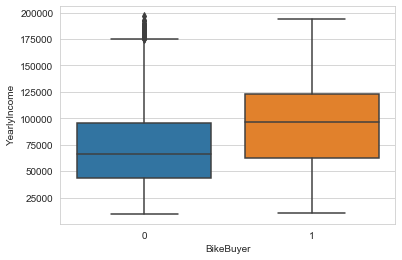

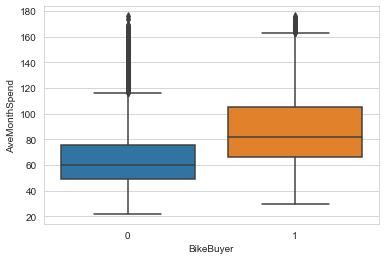

In [21]:
# Visualizing numeric features
def plot_box(credit, cols, col_x):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=credit)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
        
num_cols = ['YearlyIncome', 'AveMonthSpend']
plot_box(AdvWorksCusts, cols=num_cols, col_x='BikeBuyer')

Text(0.5, 1, 'Correlation Matrix')

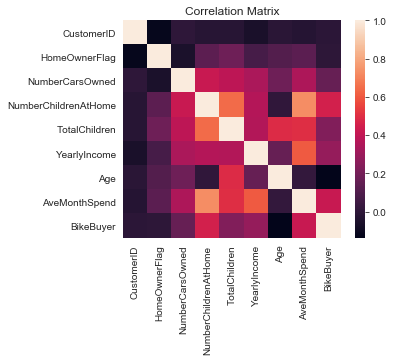

In [22]:
# Heatmap for correlation matrix
corrmat= AdvWorksCusts.corr()
f, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)
ax.set_title('Correlation Matrix')

### Distribution of numeric variables

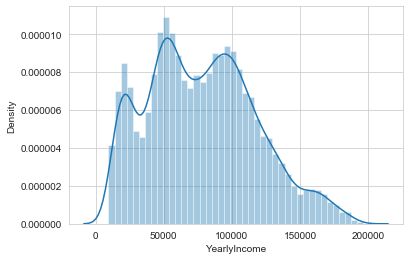

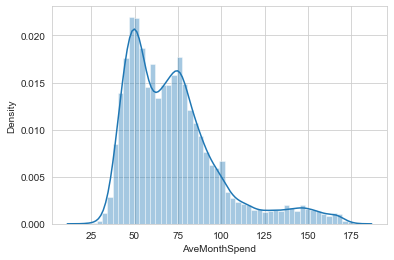

In [23]:
plot_hist(vals=AdvWorksCusts['YearlyIncome'])
plot_hist(vals=AdvWorksCusts['AveMonthSpend'])

### Visualize class separation by categorical features for classification

[1 0]
[0 1 4 2 3]
[0 3 5 4 1 2]
[2 3 0 5 4 1]
Education


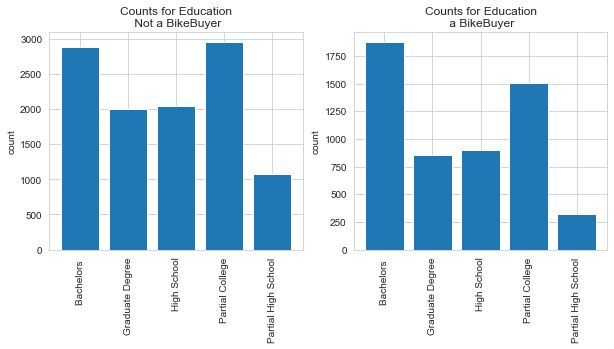

CountryRegionName


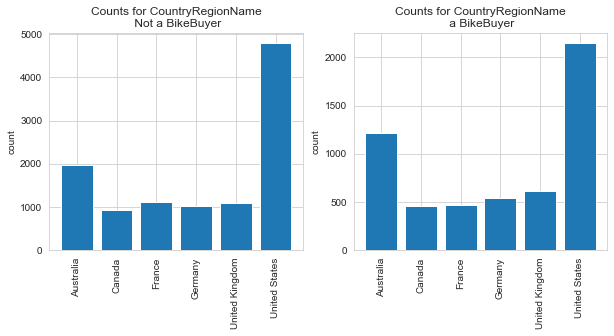

Occupation


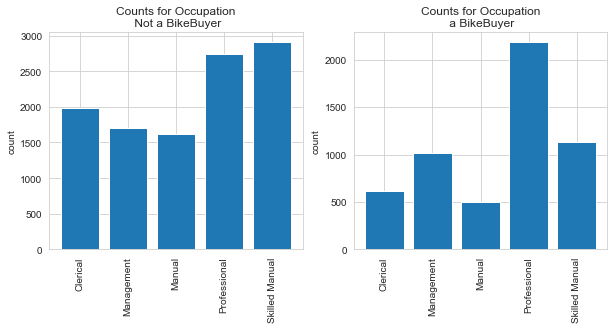

Gender


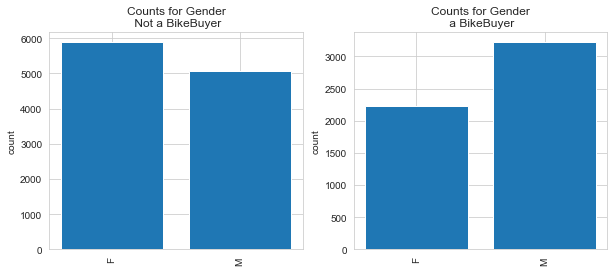

MaritalStatus


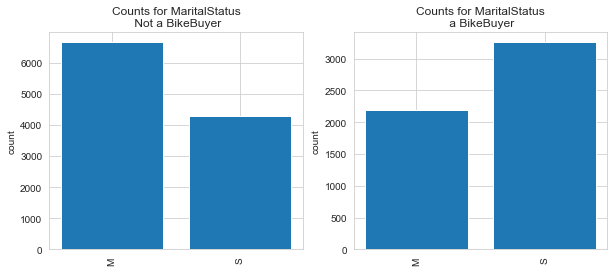

HomeOwnerFlag


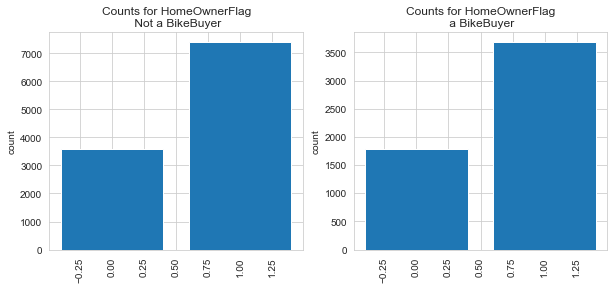

NumberCarsOwned


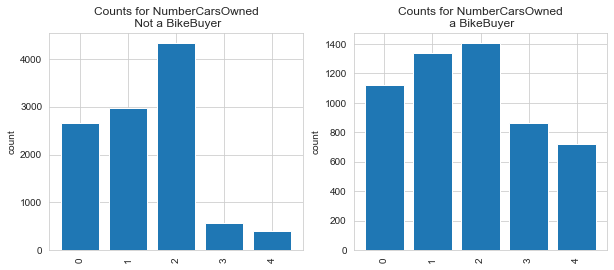

NumberChildrenAtHome


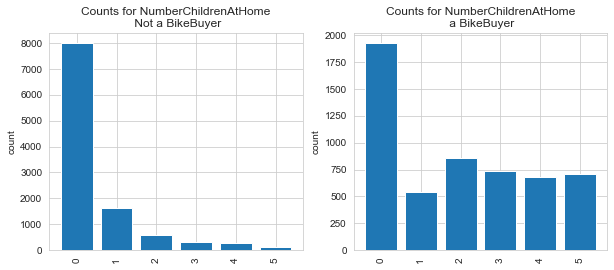

TotalChildren


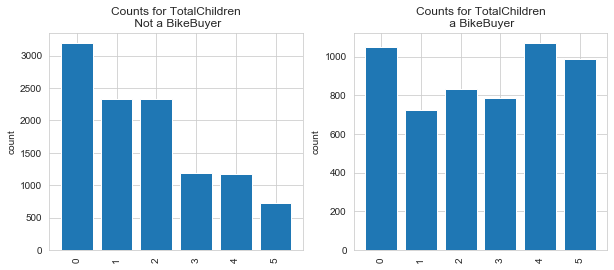

In [24]:
cat_cols = ['Education', 'CountryRegionName', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 
                       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']

print(AdvWorksCusts['HomeOwnerFlag'].unique())
print(AdvWorksCusts['NumberCarsOwned'].unique())
print(AdvWorksCusts['NumberChildrenAtHome'].unique())
print(AdvWorksCusts['TotalChildren'].unique())

AdvWorksCusts['dummy'] = np.ones(shape = AdvWorksCusts.shape[0])

def separation_cats(cat_cols):
    for col in cat_cols:
        print(col)
        counts = AdvWorksCusts[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
        temp_0 = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]

        _ = plt.figure(figsize = (10,4))
        plt.subplot(1, 2, 1)
        temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
        plt.bar(temp[col], temp_0.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n Not a BikeBuyer')
        plt.ylabel('count')

        plt.subplot(1, 2, 2)
        temp_1 = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
        plt.bar(temp[col], temp_1.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n a BikeBuyer')
        plt.ylabel('count')
        plt.show()
        
separation_cats(cat_cols)

AdvWorksCusts.drop(['dummy'], axis=1, inplace=True)

### Visualize class separation by categorical features for Regression

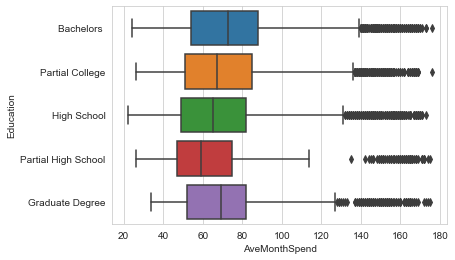

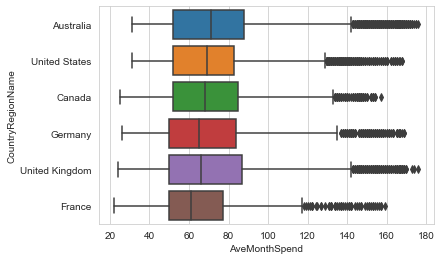

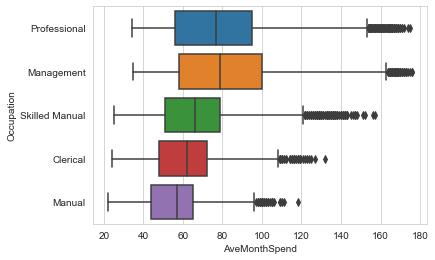

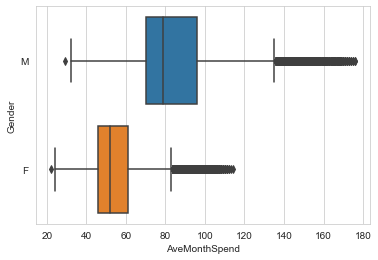

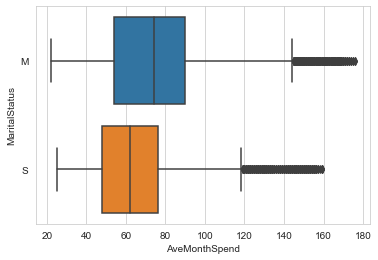

In [37]:
cat_cols = ['Education', 'CountryRegionName', 'Occupation', 'Gender', 'MaritalStatus']
plot_box(AdvWorksCusts, col_x='AveMonthSpend', cols=cat_cols)

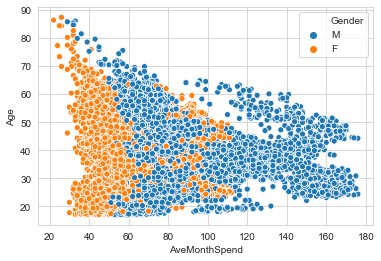

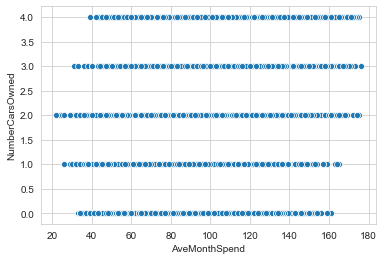

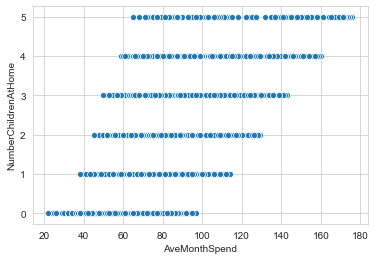

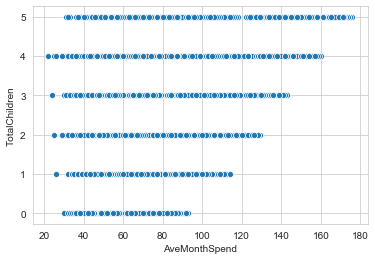

In [35]:
def plot_scatter(df, cols, col_x, col_color=None):
    for col in cols:
        sns.set_style('whitegrid')
        sns.scatterplot(x=col_x, y=col, data=df, hue=col_color)
        plt.show()

cols = ['NumberCarsOwned',  'NumberChildrenAtHome', 'TotalChildren']
plot_scatter(AdvWorksCusts, ['Age'], 'AveMonthSpend', 'Gender')
plot_scatter(AdvWorksCusts, cols, 'AveMonthSpend')